In [8]:
import torch
import json
import h5py
import random
import numpy as np
from matplotlib.pyplot import imshow
from PIL import Image, ImageDraw

In [9]:
# load the following to files from DETECTED_SGG_DIR
custom_prediction = json.load(open('../sggtest/custom_prediction.json'))
custom_data_info = json.load(open('../sggtest/custom_data_info.json'))

In [10]:
rx=1024/636.
ry=1024/636.
rx,ry=1,1

In [11]:
def draw_single_box(pic, box, color='red', draw_info=None):
    draw = ImageDraw.Draw(pic)
    x1,y1,x2,y2 = int(box[0]*rx), int(box[1]*ry), int(box[2]*rx), int(box[3]*ry)
    draw.rectangle(((x1, y1), (x2, y2)), outline=color)
    if draw_info:
        draw.rectangle(((x1, y1), (x1+50, y1+10)), fill=color)
        info = draw_info
        draw.text((x1, y1), info)
        
def print_list(name, input_list, scores=None):
    for i, item in enumerate(input_list):
        if scores == None:
            print(name + ' ' + str(i) + ': ' + str(item))
        else:
            print(name + ' ' + str(i) + ': ' + str(item) + '; score: ' + str(scores[i]))
    
def draw_image(img_path, boxes, box_labels, rel_labels, box_scores=None, rel_scores=None):
    # size = get_size(Image.open(img_path).size)
    # pic = Image.open(img_path).resize(size)
    pic = Image.open(img_path)
    num_obj = len(boxes)
    for i in range(num_obj):
        info = str(i) + '_' + str(box_labels[i])
        draw_single_box(pic, boxes[i], draw_info=info)
    display(pic)
    print('*' * 50)
    print_list('box_labels', box_labels, box_scores)
    print('*' * 50)
    print_list('rel_labels', rel_labels, rel_scores)
    
    return None

def get_size(image_size):
    min_size = 600
    max_size = 1000
    w, h = image_size
    size = min_size
    if max_size is not None:
        min_original_size = float(min((w, h)))
        max_original_size = float(max((w, h)))
        if max_original_size / min_original_size * size > max_size:
            size = int(round(max_size * min_original_size / max_original_size))
    if (w <= h and w == size) or (h <= w and h == size):
        return (w, h)
    if w < h:
        ow = size
        oh = int(size * h / w)
    else:
        oh = size
        ow = int(size * w / h)
    return (ow, oh)

In [12]:
def pp(idx):
    image_idx = idx
    box_topk = 30 # select top k bounding boxes
    rel_topk = 20 # select top k relationships
    ind_to_classes = custom_data_info['ind_to_classes']
    ind_to_predicates = custom_data_info['ind_to_predicates']


    image_path = custom_data_info['idx_to_files'][image_idx]
    boxes = custom_prediction[str(image_idx)]['bbox'][:box_topk]
    box_labels = custom_prediction[str(image_idx)]['bbox_labels'][:box_topk]
    box_scores = custom_prediction[str(image_idx)]['bbox_scores'][:box_topk]
    all_rel_labels = custom_prediction[str(image_idx)]['rel_labels']
    all_rel_scores = custom_prediction[str(image_idx)]['rel_scores']
    all_rel_pairs = custom_prediction[str(image_idx)]['rel_pairs']
    for i in range(len(box_labels)):
        try:
            box_labels[i] = ind_to_classes[box_labels[i]]
        except:
            pass

    rel_labels = []
    rel_scores = []
    for i in range(len(all_rel_pairs)):
        if all_rel_pairs[i][0] < box_topk and all_rel_pairs[i][1] < box_topk:
            try:
                rel_scores.append(all_rel_scores[i])
                label = str(all_rel_pairs[i][0]) + '_' + box_labels[all_rel_pairs[i][0]] + ' => ' + ind_to_predicates[all_rel_labels[i]] + ' => ' + str(all_rel_pairs[i][1]) + '_' + box_labels[all_rel_pairs[i][1]]
                rel_labels.append(label)
            except:
                pass

    rel_labels = rel_labels[:rel_topk]
    rel_scores = rel_scores[:rel_topk]

    draw_image(image_path, boxes, box_labels, rel_labels, box_scores=box_scores, rel_scores=rel_scores)

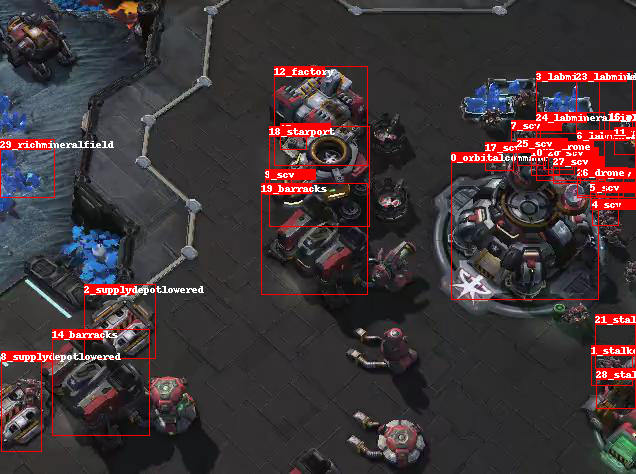

**************************************************
box_labels 0: orbitalcommand; score: 0.997576892375946
box_labels 1: stalker; score: 0.9975283741950989
box_labels 2: supplydepotlowered; score: 0.9968454241752625
box_labels 3: labmineralfield; score: 0.994364857673645
box_labels 4: scv; score: 0.9908389449119568
box_labels 5: scv; score: 0.990374743938446
box_labels 6: labmineralfield; score: 0.9858909845352173
box_labels 7: scv; score: 0.9839937686920166
box_labels 8: supplydepotlowered; score: 0.976327657699585
box_labels 9: scv; score: 0.9655444622039795
box_labels 10: scv; score: 0.962700366973877
box_labels 11: probe; score: 0.9571759700775146
box_labels 12: factory; score: 0.9519650936126709
box_labels 13: scv; score: 0.9466681480407715
box_labels 14: barracks; score: 0.9397025108337402
box_labels 15: scv; score: 0.9371788501739502
box_labels 16: probe; score: 0.9357345104217529
box_labels 17: scv; score: 0.9334496855735779
box_labels 18: starport; score: 0.8996061682701111
box

In [17]:
pp(6)